In [1]:
import pickle
import numpy as np
from ps_config import *
import matplotlib.pyplot as plt

In [2]:
with open('true_underlying_w_nodes.pkl', 'rb') as file:
    loaded_variables = pickle.load(file)

with open('history_idx_best_candid_runs.pkl', 'rb') as file:
    hist_candids = pickle.load(file)


In [3]:
ONE_HOTTED_GT = loaded_variables['one_hotted_GT']

## Here we caluclate needed probabilities

In [4]:
history_idx_best_candid_runs = hist_candids['history_idx_best_candid_runs']
ps_total = np.empty((NUM_ROUNDS, NUM_CLIENTS))
for inspected_node in range(NUM_CLIENTS):
    ps_i = np.empty((NUM_ROUNDS))

    for iter_round in range(NUM_ROUNDS):
        candidates_one_iter_all_runs = history_idx_best_candid_runs[:, iter_round, inspected_node]
        inspected_node_candidates_clusters = ONE_HOTTED_GT[:, candidates_one_iter_all_runs].argmax(axis=0)
        inspected_node_cluster = ONE_HOTTED_GT[:, inspected_node].argmax()
        indicator_rv = inspected_node_candidates_clusters == inspected_node_cluster
        ps_i[iter_round] = sum(indicator_rv)/NUM_RUNS

    ps_total[:, inspected_node] = ps_i




## Probability of Success for a Specific Node: 

Here you can find out the esimated probability of success for node `inspected_node`. 

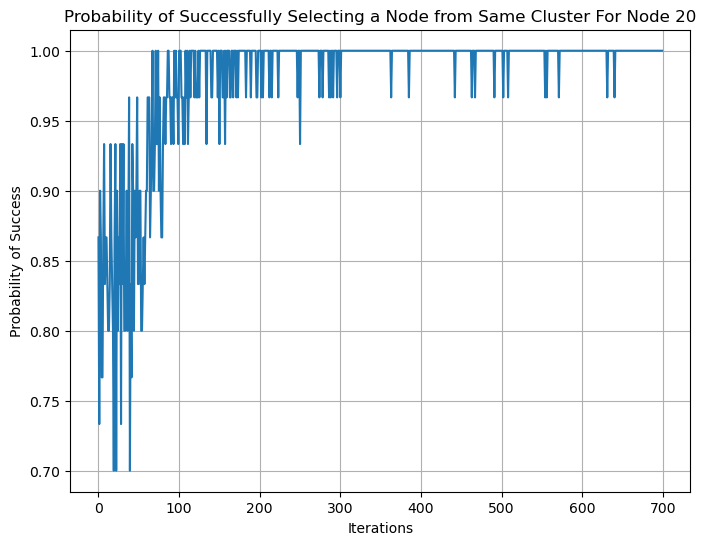

In [5]:
inspected_node = 20
x = np.arange(NUM_ROUNDS)
plt.figure(figsize=(8, 6)) 
plt.plot(x, ps_total[:, inspected_node])
plt.xlabel('Iterations')
plt.ylabel('Probability of Success')
plt.title(f'Probability of Successfully Selecting a Node from Same Cluster For Node {inspected_node}')
plt.grid(True)


## Estimated Average Probability of Success of All Nodes by Iteration:

Here we will get mean of P_s of all nodes and plot it as function of Iteration

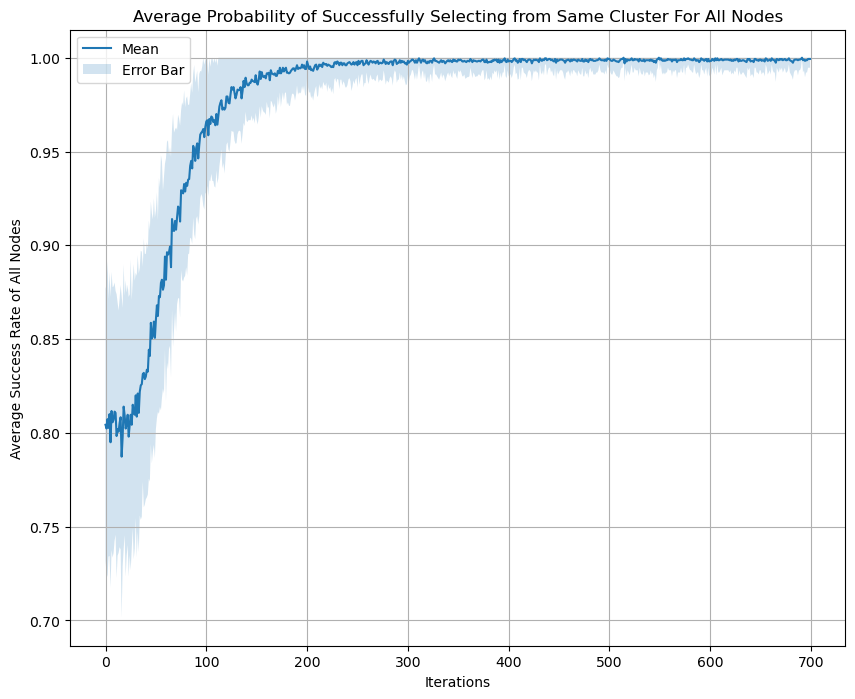

In [6]:
plt.figure(figsize=(10, 8)) 
mean_ps = ps_total.mean(axis=1)
std_ps = ps_total.std(axis=1)
lower_bound = np.clip(mean_ps - std_ps, 0, 1)
upper_bound = np.clip(mean_ps + std_ps, 0, 1)
plt.plot(x, mean_ps, label='Mean')
plt.fill_between(np.arange(NUM_ROUNDS), lower_bound, upper_bound, alpha=0.2, label='Error Bar')
plt.xlabel('Iterations')
plt.ylabel('Average Success Rate of All Nodes')
plt.title('Average Probability of Successfully Selecting from Same Cluster For All Nodes')
plt.legend()
plt.grid(True)
plt.show()
